### Import

In [2]:
from qutip import *
from qutip.operators import *
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from cython import *
from sympy import lambdify

### without RWA

In [8]:
Eq = 1
f = 0.05
def Hq():
    return Eq/2 *sigmaz()
def Hf():
    return f*sigmay()
def collapse_list():
    return []
Hf_time_coeff = "0.5*(tanh((t-a)/st) - tanh((t-b)/st))*cos(w*t + phase1) + 0.5*(tanh((t-a2)/st) - tanh((t-b2)/st))*cos(w*t + phase2)"
a = 33
b = 66
st = 0.001
phase1 = np.pi
phase2 = -np.pi/2
a2 = 70
b2 = 81.895
args = {'w':Eq, 'phase1':phase1, 'phase2':phase2,'a':a,'b':b,'st':st,'a2':a2,'b2':b2}
maxtime = 110
points = 10000
tlist = np.linspace(0,110,10000)
psi0 = (basis(2,0) + basis(2,1))/(2**0.5)

def Hq_t():
    return [Hq(),[Hf(),Hf_time_coeff]]

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


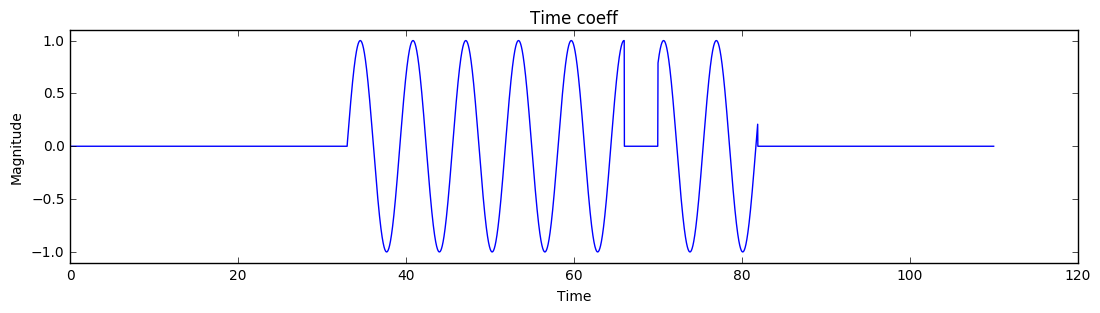

In [4]:
time_c_func = lambdify({'a','b','st','t','w','phase1','phase2','a2','b2'},Hf_time_coeff,'numpy')
fig, ax = plt.subplots(1,1, figsize=(13,3))
ax.set_title('Time coeff');
ax.plot(tlist, time_c_func(a=a,b=b,st=st,t=tlist,w=Eq,phase1=phase1,phase2=phase2,a2=a2,b2=b2))
ax.set_ylim(-1.1,1.1)
ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('Magnitude');

In [5]:
expected = [Hq()]
def solve(expected_ops = expected, with_progress_bar = True):
    if with_progress_bar:
        return mesolve(Hq_t(), psi0, tlist, collapse_list(), expected_ops, args = args,options= Options(nsteps=10000), progress_bar=True)
    else:
        return mesolve(Hq_t(), psi0, tlist, collapse_list(), expected_ops, args = args,options= Options(nsteps=10000))

In [9]:
expected = [Hq()]
evecs = [basis(2,0),basis(2,1)]
for i in range(len(evecs)):
    expected.append(evecs[i]*evecs[i].dag())
    
output = solve(expected)
type(output.expect[1])

10.0%. Run time:   0.26s. Est. time left: 00:00:00:02
20.0%. Run time:   0.52s. Est. time left: 00:00:00:02
30.0%. Run time:   0.79s. Est. time left: 00:00:00:01
40.0%. Run time:   1.04s. Est. time left: 00:00:00:01
50.0%. Run time:   1.31s. Est. time left: 00:00:00:01
60.0%. Run time:   1.57s. Est. time left: 00:00:00:01
70.0%. Run time:   1.84s. Est. time left: 00:00:00:00
80.0%. Run time:   2.10s. Est. time left: 00:00:00:00
90.0%. Run time:   2.36s. Est. time left: 00:00:00:00
Total run time:   2.63s


numpy.ndarray

In [13]:
def find_time_1st(result_occupation):
    evecs = [basis(2,0),basis(2,1)]
    for i in range(len(evecs)):
        expected.append(evecs[i]*evecs[i].dag())
    res = solve(expected).expect[1][70:-1]
    print(res[7445])
    res = abs(res-result_occupation)
    print ()
    return res.argmin()
def find_result_occupation(t2):
    args['b2'] = t2
    evecs = [basis(2,0),basis(2,1)]
    for i in range(len(evecs)):
        expected.append(evecs[i]*evecs[i].dag())
    return solve(expected,False).expect[1][-1]

In [14]:
results = open('result_occupations.txt','w')
b2list = np.linspace(a2,111,100)
for b2_id,b2 in enumerate(b2list):
    #if b2_id % 10 == 0:
    print(b2)
    print("%f %f\n"%(find_result_occupation(b2),b2-a2), file=results)
    

70.0
70.4141414141
70.8282828283
71.2424242424
71.6565656566
72.0707070707
72.4848484848
72.898989899
73.3131313131
73.7272727273
74.1414141414
74.5555555556
74.9696969697
75.3838383838
75.797979798
76.2121212121
76.6262626263
77.0404040404
77.4545454545
77.8686868687
78.2828282828
78.696969697
79.1111111111
79.5252525253
79.9393939394
80.3535353535
80.7676767677
81.1818181818
81.595959596
82.0101010101
82.4242424242
82.8383838384
83.2525252525
83.6666666667
84.0808080808
84.4949494949
84.9090909091
85.3232323232
85.7373737374
86.1515151515
86.5656565657
86.9797979798
87.3939393939
87.8080808081
88.2222222222
88.6363636364
89.0505050505
89.4646464646
89.8787878788
90.2929292929
90.7070707071
91.1212121212
91.5353535354
91.9494949495
92.3636363636
92.7777777778
93.1919191919
93.6060606061
94.0202020202
94.4343434343
94.8484848485
95.2626262626
95.6767676768
96.0909090909
96.5050505051
96.9191919192
97.3333333333
97.7474747475
98.1616161616
98.5757575758
98.9898989899
99.404040404
99.818

In [15]:
results.close()

In [18]:
results = open('result_occupations.txt','r')
t2list = []
occlist = []
for s in results:
    values = list(map(float,s.split()))
    if len(values) == 2:
        occ, t = values
    occlist.append(occ)
    t2list.append(t)


/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


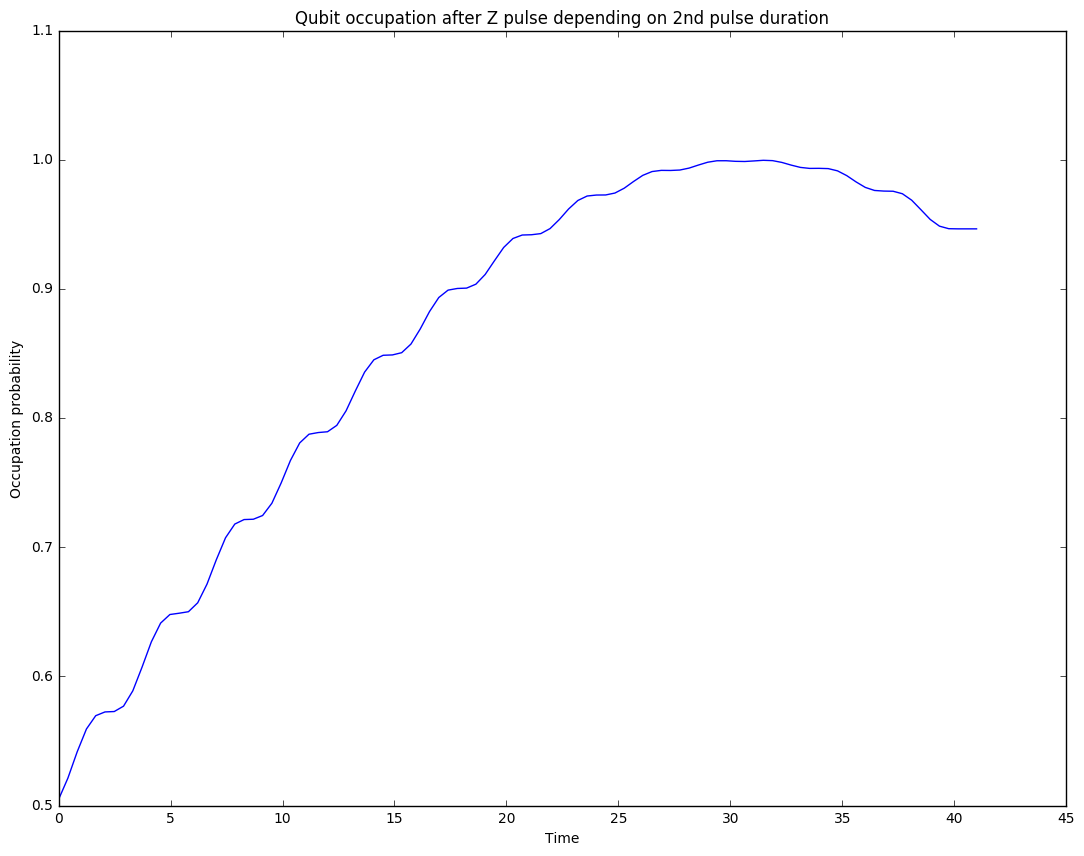

In [21]:
fig, axes = plt.subplots(1,1, figsize=(13,10), sharex=True)
axes.set_title('Qubit occupation after Z pulse depending on 2nd pulse duration');
axes.plot(t2list, occlist)
axes.set_ylim(0.5,1.1)
axes.legend()
axes.set_xlabel('Time')
axes.set_ylabel('Occupation probability')

In [92]:
oldoutput = output

0.903874742524


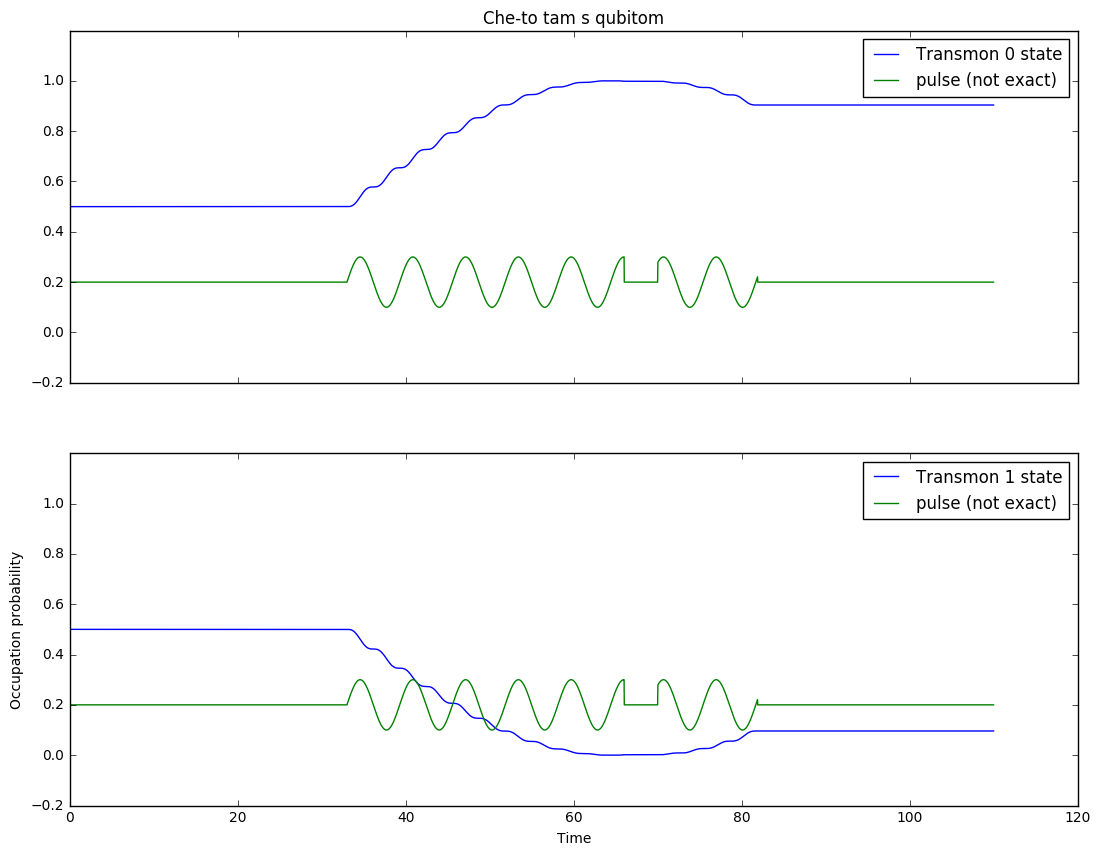

In [10]:
fig, axes = plt.subplots(2,1, figsize=(13,10), sharex=True)
axes[0].set_title('Che-to tam s qubitom');
for idx, ax in enumerate(axes):
    ax.plot(tlist, output.expect[1+idx], label="Transmon %i state"%idx)
    #ax.plot(tlist, oldoutput.expect[1+idx], label="Transmon %i state"%idx)
    ax.plot(tlist, 0.2+ 0.1*time_c_func(a=a,b=b,st=st,t=tlist,w=Eq,phase1=phase1,phase2=phase2,a2=a2,b2=b2),label="pulse (not exact)")
    ax.set_ylim(-0.2,1.2)
    ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('Occupation probability')
print(output.expect[1][-1])

In [15]:

expected = [sigmax(),sigmay(),sigmaz()]
psi0 = basis(2,0)
output = solve(expected)
type(output.expect[1])

10.0%. Run time:   0.28s. Est. time left: 00:00:00:02
20.0%. Run time:   0.55s. Est. time left: 00:00:00:02
30.0%. Run time:   0.81s. Est. time left: 00:00:00:01
40.0%. Run time:   1.06s. Est. time left: 00:00:00:01
50.0%. Run time:   1.37s. Est. time left: 00:00:00:01
60.0%. Run time:   1.62s. Est. time left: 00:00:00:01
70.0%. Run time:   1.88s. Est. time left: 00:00:00:00
80.0%. Run time:   2.13s. Est. time left: 00:00:00:00
90.0%. Run time:   2.38s. Est. time left: 00:00:00:00
Total run time:   2.62s


numpy.ndarray

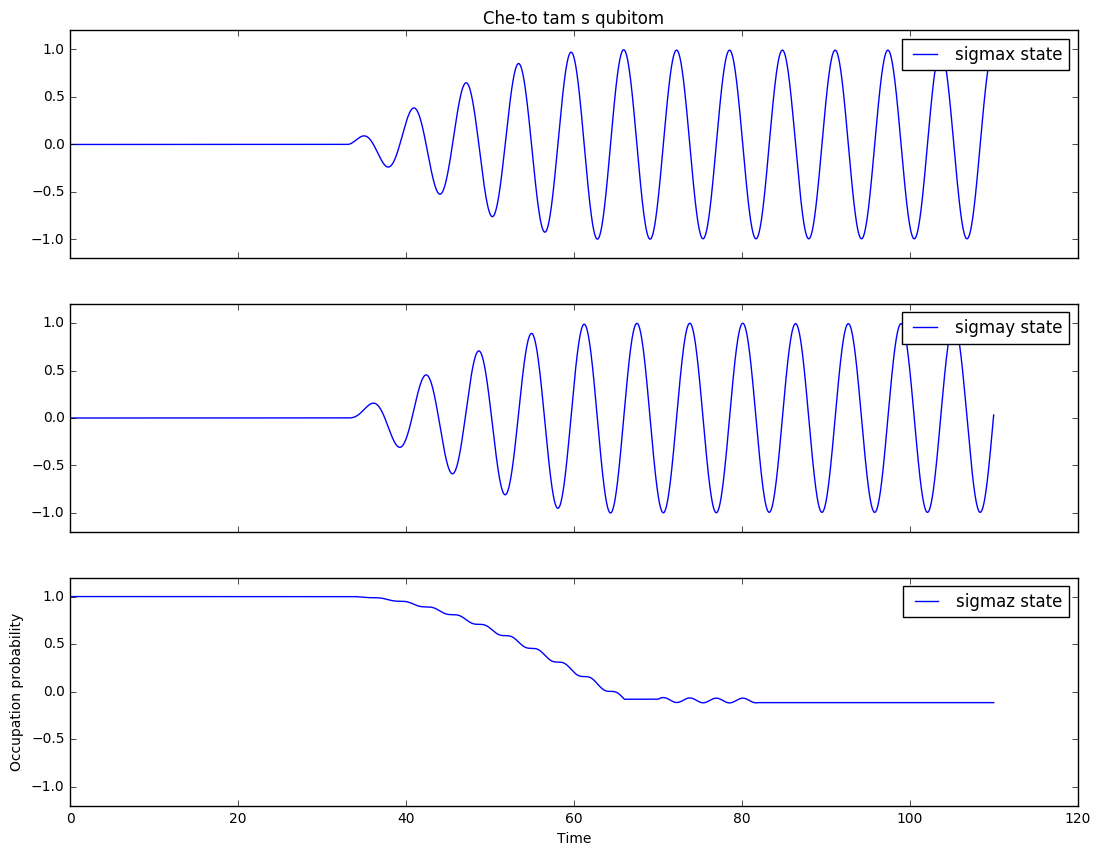

In [16]:
fig, axes = plt.subplots(3,1, figsize=(13,10), sharex=True)
axes[0].set_title('Che-to tam s qubitom');
labels = ['sigmax','sigmay','sigmaz']
for idx, ax in enumerate(axes):
    ax.plot(tlist, output.expect[idx], label=labels[idx] + " state")
    #ax.plot(tlist, oldoutput.expect[1+idx], label="Transmon %i state"%idx)
    #ax.plot(tlist, 0.2+ 0.1*time_c_func(a=a,b=b,st=st,t=tlist,w=Eq,phase1=phase1,phase2=phase2,a2=a2,b2=b2),label="pulse (not exact)")
    ax.set_ylim(-1.2,1.2)
    ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('Occupation probability')
